### **DL_PART_2_TEXT_GENERATION WITH AMERICANAIR HANDLE**

TWITTER SCRAPING PART

In [ ]:
class TwitterClient(object): 
    def __init__(self): 
        #Initialization method. 
        consumer_key='D5CvS7MrSfSoigFQFkQ5sioi4'
        consumer_secret='ci9IHZPJ2l8oX4rIolOzv359sq7iQ5vPVGuVHJW96IWIT3nyzD'
        access_token='165879850-d6GPXrp2nhM6qJG2lKleOcCJSZRhED435N8sgxD8'
        access_token_secret='kQsvtXf5pajEiqT6L2HOpxN9BYakrWDOHmsMKo0C6j18U'
        try: 
            # create OAuthHandler object 
            auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            # add hyper parameter 'proxy' if executing from behind proxy "proxy='http://172.22.218.218:8085'"
            self.api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            
        except tweepy.TweepError as e:
            print(f"Error: Tweeter Authentication Failed - \n{str(e)}")

    def get_tweets(self, query, maxTweets = 1000):
        #Function to fetch tweets. 
        # empty list to store parsed tweets 
        tweets = [] 
        sinceId = None
        max_id = -1
        tweetCount = 0
        tweetsPerQry = 100

        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry)
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break

                for tweet in new_tweets:
                    parsed_tweet = {} 
                    parsed_tweet['tweets'] = tweet.text 

                    # appending parsed tweet to tweets list
                    if tweet.retweet_count > 0: 
                        # if tweet has retweets, ensure that it is appended only once 
                        if parsed_tweet not in tweets: 
                            tweets.append(parsed_tweet) 
                    else: 
                        tweets.append(parsed_tweet) 
                        
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id

            except tweepy.TweepError as e:
                # Just exit if any error
                print("Tweepy error : " + str(e))
                break
        
        return pd.DataFrame(tweets)

In [ ]:
import tweepy #https://github.com/tweepy/tweepy
import csv

#Twitter API credentials
consumer_key='D5CvS7MrSfSoigFQFkQ5sioi4'
consumer_secret='ci9IHZPJ2l8oX4rIolOzv359sq7iQ5vPVGuVHJW96IWIT3nyzD'
access_token='165879850-d6GPXrp2nhM6qJG2lKleOcCJSZRhED435N8sgxD8'
access_token_secret='kQsvtXf5pajEiqT6L2HOpxN9BYakrWDOHmsMKo0C6j18U'

# Authorize our Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
import pandas as pd
userID = "americanair"
tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

for info in tweets[:5000]:
     data=pd.DataFrame([info.full_text])
     print(info.full_text)
     print("\n")

@illicitescapist Hi! Can you give us more flight details via DMs, so we can check this for you?


@wildbillmaddock Our offer to help still stands and all we need to check is your record locator via DMs.


@Ravipatel042 Hey! We'll be happy to take a look and advise. Meet us in DMs with the record locator, so we can see what we're working with.


@_Emariemarie We're sorry about the delay. Allow us to take a closer look at what's happening, DM us your record locator, we'll be waiting to help out.


@cjosephgk We hope you'll change your mind, Chris. We'd love to welcome you on boAArd again!


@marialho No problem! Can you share the reservation code via our DMs?


@mrbplus You can take a look here: https://t.co/eF9ECOF8iA at our option to earn miles and extend expiry, or donate: https://t.co/2XQhHeHRFE as well.


@advcards The number needs to be added for it to work so DM us for your future trips and we'll make sure the info is complete. See you on board.


@Logan_Ratick Thanks for the shou

In [ ]:
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=userID,
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

N of tweets downloaded till now 400
N of tweets downloaded till now 600
N of tweets downloaded till now 800
N of tweets downloaded till now 1000
N of tweets downloaded till now 1200
N of tweets downloaded till now 1400
N of tweets downloaded till now 1600
N of tweets downloaded till now 1800
N of tweets downloaded till now 2000
N of tweets downloaded till now 2200
N of tweets downloaded till now 2400
N of tweets downloaded till now 2600
N of tweets downloaded till now 2800
N of tweets downloaded till now 3000
N of tweets downloaded till now 3200
N of tweets downloaded till now 3250


In [ ]:
#transform the tweepy tweets into a 2D array that will populate the csv	
from pandas import DataFrame
outtweets = [[tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(all_tweets)]
df = DataFrame(outtweets,columns=["text"])
df.to_csv('%s_tweets.csv' % userID,index=False)
df.head(3)

,text
0,@illicitescapist Hi! Can you give us more flig...
1,@wildbillmaddock Our offer to help still stand...
2,@Ravipatel042 Hey! We'll be happy to take a lo...


In [ ]:
df.shape

(3250, 1)

In [ ]:
df2

,clean_tweet
0,best way prevent new variant emerg stop transm...
1,encourag see innov clean energi invest forefro...
2,five thing know want understand variant ' comp...
3,technolog transform need address climat chang ...
4,great time answer question new book climat cha...
...,...
3018,nigeria made phenomen progress toward erad pol...
3019,inspir nytim scienc section small fix low cost...
3020,great tom brokaw interview melindag warren sus...
3021,look www teacherwal org convers america teache...


In [ ]:
from texthero import preprocessing
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace
                   , preprocessing.stem]
df['clean_tweet'] = hero.clean(df['text'], pipeline = custom_pipeline)

In [ ]:
df

,text
0,@illicitescapist Hi! Can you give us more flig...
1,@wildbillmaddock Our offer to help still stand...
2,@Ravipatel042 Hey! We'll be happy to take a lo...
3,@_Emariemarie We're sorry about the delay. All...
4,"@cjosephgk We hope you'll change your mind, Ch..."
...,...
3245,@ClassicGeiger We appreciate the kudos for our...
3246,@uconsteve Join us in the DMs with your reserv...
3247,@atleeeyy We never want to separate you from y...
3248,@Hood__Winked Friendly and professional servic...


In [ ]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['hi can you give us more flight details via dms so we can check this for you',
 'our offer to help still stands and all we need to check is your record locator via dms',
 'hey we ll be happy to take a look and advise meet us in dms with the record locator so we can see what we re working with',
 'emariemarie we re sorry about the delay allow us to take a closer look at what s happening dm us your record locator we ll be waiting to help out',
 'we hope you ll change your mind chris we d love to welcome you on boaard again',
 'no problem can you share the reservation code via our dms',
 'you can take a look here at our option to earn miles and extend expiry or donate as well',
 'the number needs to be added for it to work so dm us for your future trips and we ll make sure the info is complete see you on board',
 'ratick thanks for the shout out to our deneatra we ll pass this along aateam',
 'oh no and please call baggage service at about filing a claim we re very sorry to see this happ

In [ ]:

print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
  print("Tweets %d of %d has been processed" % (i+1,i+2))                                                                  
  clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 1 of 2 has been processed
Tweets 2 of 3 has been processed
Tweets 3 of 4 has been processed
Tweets 4 of 5 has been processed
Tweets 5 of 6 has been processed
Tweets 6 of 7 has been processed
Tweets 7 of 8 has been processed
Tweets 8 of 9 has been processed
Tweets 9 of 10 has been processed
Tweets 10 of 11 has been processed
Tweets 11 of 12 has been processed
Tweets 12 of 13 has been processed
Tweets 13 of 14 has been processed
Tweets 14 of 15 has been processed
Tweets 15 of 16 has been processed
Tweets 16 of 17 has been processed
Tweets 17 of 18 has been processed
Tweets 18 of 19 has been processed
Tweets 19 of 20 has been processed
Tweets 20 of 21 has been processed
Tweets 21 of 22 has been processed
Tweets 22 of 23 has been processed
Tweets 23 of 24 has been processed
Tweets 24 of 25 has been processed
Tweets 25 of 26 has been processed
Tweets 26 of 27 has been processed
Tweets 27 of 28 has been processed
Tweets 28 of 29 has been processed
T

KeyError: ignored

In [ ]:
clean_tweet_texts


['hi can you give us more flight details via dms so we can check this for you',
 'our offer to help still stands and all we need to check is your record locator via dms',
 'hey we ll be happy to take a look and advise meet us in dms with the record locator so we can see what we re working with',
 'emariemarie we re sorry about the delay allow us to take a closer look at what s happening dm us your record locator we ll be waiting to help out',
 'we hope you ll change your mind chris we d love to welcome you on boaard again',
 'no problem can you share the reservation code via our dms',
 'you can take a look here at our option to earn miles and extend expiry or donate as well',
 'the number needs to be added for it to work so dm us for your future trips and we ll make sure the info is complete see you on board',
 'ratick thanks for the shout out to our deneatra we ll pass this along aateam',
 'oh no and please call baggage service at about filing a claim we re very sorry to see this happ

In [ ]:
df5 = pd.DataFrame (clean_tweet_texts,columns=['text'])

In [ ]:
df5

,text
0,hi can you give us more flight details via dms...
1,our offer to help still stands and all we need...
2,hey we ll be happy to take a look and advise m...
3,emariemarie we re sorry about the delay allow ...
4,we hope you ll change your mind chris we d lov...
...,...
3245,we appreciate the kudos for our team and would...
3246,join us in the dms with your reservation code ...
3247,we never want to separate you from your things...
3248,winked friendly and professional service is ex...


In [ ]:
clean_tweet_texts

array([['hi can you give us more flight details via dms so we can check this for you'],
       ['our offer to help still stands and all we need to check is your record locator via dms'],
       ['hey we ll be happy to take a look and advise meet us in dms with the record locator so we can see what we re working with'],
       ...,
       ['we never want to separate you from your things please dm your bag tag and we ll take a quick look at this with you'],
       ['winked friendly and professional service is expected from our team members at all times we d like to hear more and ask you move over to dm'],
       ['thanks for much for your patience we re glad to see your bag has now arrived in baggage claim']],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import re

In [ ]:
# THIS CAN BE DONE BUT HERE PREPROCESSING IS PERFORMED THROUGH texthero

# contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

#                            "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

#                            "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

#                            "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

#                            "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

#                            "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

#                            "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

#                            "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

#                            "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

#                            "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

#                            "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

#                            "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

#                            "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

#                            "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

#                            "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

#                            "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

#                            "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

#                            "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

#                            "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

#                            "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

#                            "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

#                            "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

#                            "you're": "you are", "you've": "you have"}
# import nltk
# nltk.download('stopwords')
# #STOP_WORDS = set(stopwords.words('english')) 
# from nltk.corpus import stopwords
# STOP_WORDS = set(stopwords.words('english')) 
# def CLEAN_TEXT(text):
#     text = text.lower()
#     #text = text.replace('\%','')
#     text = re.sub('\[.*?\]', '', text)
#     # text = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', text)
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])    
#     #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     text = " ".join(filter(lambda x:x[0]!="@", text.split()))
#     return text
# # #import the data
# # data_path = '/content/drive/MyDrive/Datasets/Donald-Tweets!.csv'
# # data = pd.read_csv(data_path)
# # #Function to clean the text
# # def clean_text(text):
# #     '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
# #     and remove words containing numbers.'''
# #     text = text.lower()
# #     #text = text.replace('\%','')
# #     text = re.sub('\[.*?\]', '', text)
# #     text = re.sub('https?://\S+|www\.\S+', '', text)
# #     text = re.sub('<.*?>+', '', text)
# #     #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
# #     text = re.sub('\n', '', text)
# #     text = re.sub('\w*\d\w*', '', text)
# #     text = " ".join(filter(lambda x:x[0]!="@", text.split()))
# #     return text
# # # #Apply the function
# # # data['Tweet_Text'] = data['Tweet_Text'].apply(lambda x: clean_text(x))
# # # data = data['Tweet_Text']
# import pandas as pd
# import numpy as np
# import json
# from collections import Counter
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import re, string, unicodedata
# import nltk
# from nltk import word_tokenize, sent_tokenize, FreqDist
# from nltk.corpus import stopwords
# from nltk.stem import LancasterStemmer, WordNetLemmatizer
# nltk.download
# nltk.download('wordnet')
# nltk.download('stopwords')
# from nltk.tokenize import TweetTokenizer
# !pip install ekphrasis
# !pip install tweet-preprocessor
# def preprocess_data(data):
#  #Removes Numbers
#  data = data.astype(str).str.replace('\d+', '')
#  lower_text = data.str.lower()
#  lemmatizer = nltk.stem.WordNetLemmatizer()
#  w_tokenizer =  TweetTokenizer()
 
#  def lemmatize_text(text):
#   return [(lemmatizer.lemmatize(w)) for w \
#                        in w_tokenizer.tokenize((text))]
#  def remove_punctuation(words):
#    new_words = []
#    for word in words:
#       new_word = re.sub(r'[^\w\s]', '', (word))
#       if new_word != '':
#          new_words.append(new_word)
#    return new_words
#  words = lower_text.apply(lemmatize_text)
#  words = words.apply(remove_punctuation)
#  return pd.DataFrame(words)
# pre_tweets = preprocess_data(df['text'])
# df['text'] = pre_tweets
# stop_words = set(stopwords.words('english'))
# df['text'] = df['text'].apply(lambda x: [item for item in \
#                                     x if item not in stop_words])
# def clean_text(text):
#     text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
#     text_rc = re.sub('[0-9]+', '', text_lc)
#     tokens = re.split('\W+', text_rc)    # tokenization
#     text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
#     return text
# df['clean_text']=clean_text['']
# import regex as re
# df['tweet'] = df['clean_tweet'].apply(lambda x: CLEAN_TEXT(x))
# df = df['tweet']

In [ ]:
df5

,text
0,hi can you give us more flight details via dms...
1,our offer to help still stands and all we need...
2,hey we ll be happy to take a look and advise m...
3,emariemarie we re sorry about the delay allow ...
4,we hope you ll change your mind chris we d lov...
...,...
3245,we appreciate the kudos for our team and would...
3246,join us in the dms with your reservation code ...
3247,we never want to separate you from your things...
3248,winked friendly and professional service is ex...


In [ ]:
clean_tweet_texts=np.array(clean_tweet_texts)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df5['text'])
total_words = len(tokenizer.word_index) + 1
print(total_words) #5952
input_sequences = []
for line in df5['text']:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

3021


In [ ]:
print(tokenizer.word_index)

{'we': 1, 'to': 2, 'your': 3, 'you': 4, 'and': 5, 'the': 6, 'our': 7, 'with': 8, 'for': 9, 're': 10, 'a': 11, 'dm': 12, 'us': 13, 'in': 14, 'please': 15, 'on': 16, 'can': 17, 'll': 18, 'this': 19, 's': 20, 'have': 21, 'locator': 22, 'record': 23, 'be': 24, 'dms': 25, 'help': 26, 'is': 27, 'as': 28, 'team': 29, 'sorry': 30, 'details': 31, 'look': 32, 'here': 33, 'of': 34, 'it': 35, 'if': 36, 'flight': 37, 'that': 38, 'see': 39, 'more': 40, 'so': 41, 't': 42, 'are': 43, 'info': 44, 'd': 45, 'what': 46, 'like': 47, 'take': 48, 'meet': 49, 've': 50, 'at': 51, 'check': 52, 'will': 53, 'over': 54, 'code': 55, 'there': 56, 'all': 57, 'via': 58, 'happy': 59, 'out': 60, 'let': 61, 'get': 62, 'need': 63, 'send': 64, 'any': 65, 'reservation': 66, 'hear': 67, 'share': 68, 'want': 69, 'wait': 70, 'know': 71, 'they': 72, 'or': 73, 'thanks': 74, 'always': 75, 'time': 76, 'appreciate': 77, 'up': 78, 'soon': 79, 'how': 80, 'board': 81, 'way': 82, 'great': 83, 'do': 84, 'number': 85, 'trip': 86, 'about'

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre'))
print(max_sequence_length)
# creating predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(xs,ys,test_size=0.2,random_state=100)

In [ ]:
df5['text'][7]

'the number needs to be added for it to work so dm us for your future trips and we ll make sure the info is complete see you on board'

### LSTM MODEL: 

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length-1))
model.add(LSTM(200, return_sequences=True))
model.add(LSTM(500))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 41, 100)           302100    
_________________________________________________________________
lstm (LSTM)                  (None, 41, 200)           240800    
_________________________________________________________________
lstm_1 (LSTM)                (None, 500)               1402000   
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense (Dense)                (None, 3021)              1513521   
Total params: 3,458,421
Trainable params: 3,458,421
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!pip install pydot
!pip install pydot_ng
!pip install graphviz

In [ ]:
!pip install plot_model

In [ ]:
from keras.utils.vis_utils import plot_model

## LSTM MODEL PLOT

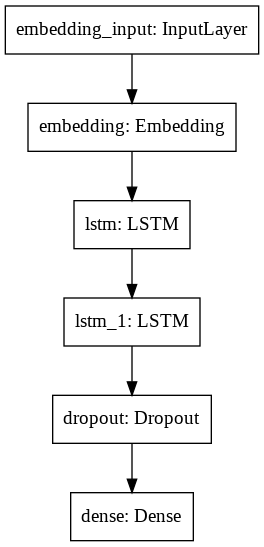

In [ ]:
plot_model(model)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 2)

mc = ModelCheckpoint('best_model3.h5',
                    monitor = 'val_loss',
                    mode = 'min',
                    verbose = 1,
                    save_best_only = True)

## MODEL BUILDING: 

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])
history = model.fit(xs,ys,callbacks=[es,mc],epochs=25, verbose=1,validation_data=(X_test,y_test))

Epoch 1/25
1909/1909 [==============================] - 34s 16ms/step - loss: 3.0665 - accuracy: 0.3644 - val_loss: 2.7902 - val_accuracy: 0.4052

Epoch 00001: val_loss improved from 2.80700 to 2.79017, saving model to best_model3.h5
Epoch 2/25
1909/1909 [==============================] - 32s 17ms/step - loss: 2.8803 - accuracy: 0.3867 - val_loss: 2.5392 - val_accuracy: 0.4299

Epoch 00002: val_loss improved from 2.79017 to 2.53922, saving model to best_model3.h5
Epoch 3/25
1909/1909 [==============================] - 32s 17ms/step - loss: 2.6479 - accuracy: 0.4130 - val_loss: 2.3114 - val_accuracy: 0.4610

Epoch 00003: val_loss improved from 2.53922 to 2.31143, saving model to best_model3.h5
Epoch 4/25
1909/1909 [==============================] - 32s 17ms/step - loss: 2.4648 - accuracy: 0.4291 - val_loss: 2.1029 - val_accuracy: 0.4928

Epoch 00004: val_loss improved from 2.31143 to 2.10287, saving model to best_model3.h5
Epoch 5/25
1909/1909 [==============================] - 32s 17ms

In [ ]:
!pip install rouge-score

In [ ]:
df[8]

'it’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:'

### SAVING THE MODEL

In [ ]:
model_json1 = model.to_json()
with open("model_final_american_airlines.json", "w") as json_file:
    json_file.write(model_json1)
# serialize weights to HDF5
model.save_weights("model_final_american_airlines.h5")

In [ ]:
from keras.models import model_from_json 

# opening and store file in a variable

json_file = open('model2.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("model2.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Loaded Model from disk


In [ ]:
df[20]

'we are fortunate to have an energy secretary who is focused on creating high-quality jobs to build a clean energy economy. i look forward to working with on clean tech innovation and deployment.'

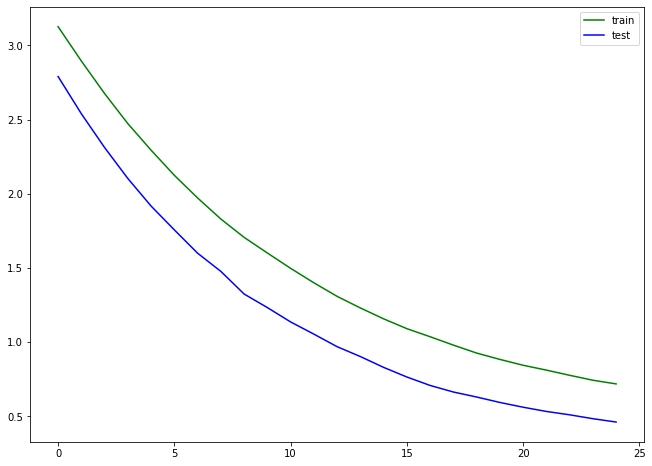

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize = (11,8))
pyplot.plot(history.history['loss'], label = 'train', color = 'green')
pyplot.plot(history.history['val_loss'], label = 'test', color = 'blue')
pyplot.legend()
pyplot.show()

In [ ]:
df5['text'][10]

'masks should be worn on board and we d like to investigate please dm your record locator and our apologies that the policy wasn t enforced'

## PREDICTION PHASE:

In [ ]:
seed_text = "masks are"
next_words = 15

In [ ]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

masks are required on board and in the airport when you re traveling here s more info


In [ ]:
df5['text'][9]

'oh no and please call baggage service at about filing a claim we re very sorry to see this happened'

In [ ]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
print(seed_text)
scores = scorer.score('oh no and please call baggage service at about filing a claim we re going to pass this on for our',
                      'oh no and please call baggage service at about filing a claim we re very sorry to see this happened')

oh no and please call baggage service at about filing a claim we re going to pass this on for our


In [ ]:
scores

{'rouge1': Score(precision=0.8, recall=0.7619047619047619, fmeasure=0.7804878048780488),
 'rougeL': Score(precision=0.8, recall=0.7619047619047619, fmeasure=0.7804878048780488)}

## **THE TRANSFORMERS PART: JDS SUMMARIZER**

In [ ]:
pip install transformers

     |████████████████████████████████| 2.0MB 18.3MB/s 
     |████████████████████████████████| 870kB 53.2MB/s 
     |████████████████████████████████| 3.2MB 46.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=471b658eadb062341a4e457e7739c3ea02753e842801143722df62410a2ce5a0
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses


In [ ]:
from transformers import pipeline
summarization = pipeline("summarization")
original_text = """
Managing master data, including creation, updates, and deletion.
Managing users and user roles.
Provide quality assurance of imported data, working with quality assurance analysts if necessary.
Commissioning and decommissioning of data sets.
Processing confidential data and information according to guidelines.
Helping develop reports and analysis.
Managing and designing the reporting environment, including data sources, security, and metadata.
Supporting the data warehouse in identifying and revising reporting requirements.
Supporting initiatives for data integrity and normalization.
Assessing tests and implementing new or upgraded software and assisting with strategic decisions on new systems.
Generating reports from single or multiple systems.
Troubleshooting the reporting database environment and reports.
Evaluating changes and updates to source production systems.
Training end-users on new reports and dashboards.
Providing technical expertise in data storage structures, data mining, and data cleansing
"""
summarized = summarization(original_text)
print(summarized[0]['summary_text'])

Summary: [{'summary_text': ' The role includes managing master data, including creation, updates, and deletion . The role also includes managing and designing the reporting environment, including data sources, security, and metadata. The role is to provide quality assurance of imported data, working with quality assurance analysts if necessary. It also includes providing technical expertise in data storage structures, data mining, and data cleansing.'}]


In [ ]:
str(summarized)

"[{'summary_text': ' The role includes managing master data, including creation, updates, and deletion . The role also includes managing and designing the reporting environment, including data sources, security, and metadata. The role is to provide quality assurance of imported data, working with quality assurance analysts if necessary. It also includes providing technical expertise in data storage structures, data mining, and data cleansing.'}]"

In [ ]:
str(summarized[0])

"{'summary_text': ' The role includes managing master data, including creation, updates, and deletion . The role also includes managing and designing the reporting environment, including data sources, security, and metadata. The role is to provide quality assurance of imported data, working with quality assurance analysts if necessary. It also includes providing technical expertise in data storage structures, data mining, and data cleansing.'}"